In [1]:
# Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Importing the csv data to a Pandas DataFrame
data = pd.read_csv("/content/data.csv", sep='\t', low_memory=False )

In [3]:
data.info()
print(list(data.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB
['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E', 'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E', 'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I', 'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A', 'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E', 'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I', 'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A', 'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E', 'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I', 'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A', 'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E', 'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A', 'Q36I', 'Q36E'

In [4]:
# Printing first five rows of dataset
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [6]:
# Checking for null values
data.isnull().sum()

Q1A               0
Q1I               0
Q1E               0
Q2A               0
Q2I               0
              ...  
race              0
voted             0
married           0
familysize        0
major         11403
Length: 172, dtype: int64

In [7]:
type(data)

pandas.core.frame.DataFrame

changing the response values from range 1-4 to 0-3 for the Dass 42 scales

In [8]:
#data["Q1A"] = data["Q1A"].replace([4, 3, 2, 1],[3, 2, 1, 0])
for i in range(0,124):
    data.iloc[:, i] = data.iloc[:, i].replace([4, 3, 2, 1],[3, 2, 1, 0])
    i = i+3


In [9]:
# Printing first five rows of dataset
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,3,28,3890,3,25,2122,1,16,1944,3,...,1,1,1,12,1,10,2,1,2,NaN
1,3,1,8118,0,36,2890,1,35,4777,2,...,2,1,2,7,0,70,2,1,4,NaN
2,2,7,5784,0,33,4373,3,41,3242,0,...,2,1,1,4,3,60,1,1,3,NaN
3,1,23,5081,2,11,6837,1,37,5521,0,...,2,1,2,4,5,70,2,1,5,biology
4,1,36,3215,1,13,7731,2,5,4156,3,...,2,2,3,10,1,10,2,1,4,Psychology


In [10]:
data['country'].unique()

array(['IN', 'US', 'PL', 'MY', 'MX', 'GB', 'DE', 'EE', 'CA', 'EC', 'AU',
       'FI', 'ID', 'AE', 'NONE', 'ES', 'NI', 'DO', 'TR', 'NO', 'GR', 'LK',
       'BR', 'AR', 'KH', 'IT', 'MK', 'PT', 'BA', 'RU', 'HU', 'KR', 'IE',
       'RS', 'CZ', 'PH', 'RO', 'FR', 'SG', 'AT', 'UA', 'KW', 'CO', 'GE',
       'SE', 'HK', 'NZ', 'ZA', 'NL', 'DK', 'JM', 'LB', 'CL', 'AW', 'IL',
       'GT', 'PE', 'PK', 'NP', 'HR', 'CR', 'VE', 'BG', 'GH', 'MA', 'PR',
       'SI', 'LV', 'AL', 'VN', 'GU', 'BD', 'TH', 'NG', 'FO', 'UY', 'EG',
       'BE', 'SA', 'SV', 'CH', 'PY', 'SK', 'SY', 'TN', 'TT', 'SR', 'KE',
       'BY', 'PA', 'CY', 'BW', 'MZ', 'BB', 'GG', 'CW', 'IS', 'IR', 'BN',
       'MV', 'OM', 'DZ', 'JP', 'MU', nan, 'IQ', 'BO', 'MD', 'CN', 'LT',
       'BZ', 'BH', 'ME', 'QA', 'TW', 'PS', 'JO', 'SD', 'KY', 'AZ', 'AO',
       'BS', 'GY', 'MO', 'TZ', 'IM', 'AF', 'AM', 'UZ', 'LU', 'ET', 'JE',
       'VU', 'TJ', 'KZ', 'XK', 'HN', 'ZW', 'LA', 'MT', 'SN', 'MN', 'TG',
       'SC', 'RE', 'VC'], dtype=object)

In [11]:
data = data.drop(['country','major'],axis=1)

print(list(data.columns))

['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E', 'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E', 'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I', 'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A', 'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E', 'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I', 'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A', 'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E', 'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I', 'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A', 'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E', 'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A', 'Q36I', 'Q36E', 'Q37A', 'Q37I', 'Q37E', 'Q38A', 'Q38I', 'Q38E', 'Q39A', 'Q39I', 'Q39E', 'Q40A', 'Q40I', 'Q40E', 'Q41A', 'Q41I', 'Q41E', 'Q42A', 'Q42I', 'Q42E', 'source', 'introel

If a person has taken more than 25s to answer a question, that response is not reliable and so we will not consider it

In [12]:
for i in range(0,124):
    for j in range(0, 39775):
        if(data.iloc[j, i+2] > 25000):
            data.iloc[j, i] = 0
        j = j+1
    i = i+3

In [13]:
print(data["Q1A"])

0        3
1        3
2        2
3        1
4        1
        ..
39770    1
39771    2
39772    0
39773    2
39774    0
Name: Q1A, Length: 39775, dtype: int64


creating outcome columns for Stress, Anxiety and Depression

In [14]:
#stress_scale = []
#def Stress_scale(stress):
#    if stress <=14:
#        stress_scale.append("Normal S")
#    elif stress >14 and stress <=18:
#        stress_scale.append("Mild S")
#    elif stress >18 and stress <= 25:
#        stress_scale.append("Moderate S")
#    elif stress > 25 and stress <= 33:
#        stress_scale.append("Severe S")
#    else:
#        stress_scale.append("Extremely S")
#    return stress_scale


In [15]:
stress = data["Q1A"] + data["Q6A"] + data["Q8A"] + data["Q11A"] + data["Q12A"] + data["Q14A"] + data["Q18A"] + data["Q22A"] +data["Q27A"] + data["Q29A"] + data["Q32A"] + data["Q33A"] + data["Q35A"] + data["Q39A"]
#print(stress)
data["Stress"] = stress 
data["Stress_R"] = stress #column to be used for regression approach
data["Stress"] = data["Stress"].apply(lambda stress: 'Normal S' if stress <=14 else ('Mild S' if stress >14 and stress <=18 else ('Moderate S' if stress >18 and stress <= 25 else('Severe S' if stress > 25 and stress <= 33 else 'Extremely S')))) #column used for classification approach
#data["Stress_scale"] = data["Stress"].apply(Stress_scale)
#data["Stress_scale"] = Stress_scale(data[["Stress"]])

anxiety = data["Q2A"] + data["Q4A"] + data["Q7A"] + data["Q9A"] + data["Q15A"] + data["Q19A"] + data["Q20A"] + data["Q23A"] +data["Q25A"] + data["Q28A"] + data["Q30A"] + data["Q36A"] + data["Q40A"] + data["Q41A"]
data["Anxiety"] = anxiety
data["Anxiety_R"] = anxiety
data["Anxiety"] = data["Anxiety"].apply(lambda anxiety: 'Normal A' if anxiety <=7 else ('Mild A' if anxiety >7 and anxiety <=9 else ('Moderate A' if anxiety >9 and anxiety <= 14 else('Severe A' if anxiety > 14 and anxiety <= 19 else 'Extremely A'))))


depression = data["Q3A"] + data["Q5A"] + data["Q10A"] + data["Q13A"] + data["Q16A"] + data["Q17A"] + data["Q21A"] + data["Q24A"] + data["Q26A"] + data["Q31A"] + data["Q34A"] + data["Q37A"] + data["Q38A"] + data["Q42A"] 
data["Depression"] = depression
data["Depression_R"] = depression
data["Depression"] = data["Depression"].apply(lambda depression: 'Normal D' if depression <=9 else ('Mild D' if depression >9 and depression <=13 else ('Moderate D' if depression >9 and depression <= 14 else('Severe D' if depression > 14 and depression <= 19 else 'Extremely D'))))
print(data["Anxiety"])
#anxiety = data

0        Extremely A
1           Severe A
2         Moderate A
3           Severe A
4        Extremely A
            ...     
39770     Moderate A
39771    Extremely A
39772       Normal A
39773     Moderate A
39774     Moderate A
Name: Anxiety, Length: 39775, dtype: object


In [16]:
import matplotlib.pyplot as plt

#plt.scatter(data['Stress_R'], data['age'])
#plt.plot(data['Depression_R'])
#plt.plot(data['Anxiety_R'])

In [17]:
teen_data = (data['age'] > 12) & (data['age'] <= 19)
teen_data = data.loc[teen_data]
teen_data

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,race,voted,married,familysize,Stress,Stress_R,Anxiety,Anxiety_R,Depression,Depression_R
0,3,28,3890,3,25,2122,1,16,1944,3,...,10,2,1,2,Extremely S,40,Extremely A,34,Extremely D,27
1,3,1,8118,0,36,2890,1,35,4777,2,...,70,2,1,4,Severe S,27,Severe A,17,Extremely D,24
2,2,7,5784,0,33,4373,3,41,3242,0,...,60,1,1,3,Mild S,15,Moderate A,12,Extremely D,39
3,1,23,5081,2,11,6837,1,37,5521,0,...,70,2,1,5,Mild S,16,Severe A,17,Severe D,16
4,1,36,3215,1,13,7731,2,5,4156,3,...,10,2,1,4,Severe S,29,Extremely A,40,Extremely D,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39759,1,41,15596,0,24,1818,1,25,1921,0,...,10,2,1,4,Mild S,18,Moderate A,10,Extremely D,22
39766,1,39,2305,0,33,2188,0,7,1924,1,...,70,1,1,2,Mild S,15,Severe A,19,Normal D,7
39767,3,0,14275,3,3,4721,3,33,3934,2,...,20,2,1,2,Severe S,32,Extremely A,25,Extremely D,36
39769,0,32,28897,3,3,3025,1,30,3248,1,...,70,2,1,3,Severe S,27,Extremely A,21,Severe D,15


In [18]:
modeldataR = teen_data[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A',
"Q2A","Q4A","Q7A","Q9A","Q15A","Q19A","Q20A","Q23A","Q25A","Q28A","Q30A","Q36A","Q40A","Q41A","Q3A","Q5A","Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A",'age','Stress_R','Depression_R','Anxiety_R']]

In [19]:
#splittin the data in train and test sets
from sklearn.model_selection import train_test_split

In [20]:
X = modeldataR.iloc[:, :43].values
Y = modeldataR.iloc[:, 43:].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
    test_size=0.2, random_state= 8)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11060, 43)
(11060, 3)
(2765, 43)
(2765, 3)


First approach - Using Regression method

In [22]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [23]:
#Implementing Linear Regression 

log_model = LinearRegression()
wrapper = MultiOutputRegressor(estimator = log_model)
# fit model
wrapper.fit(x_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [24]:
log_pred = wrapper.predict(x_test)

log_pred = log_pred.astype(int)
print(log_pred)

[[29 38 24]
 [15  5  7]
 [39 35 37]
 ...
 [ 4  4  5]
 [25 40 18]
 [11  8 14]]


In [112]:
log_accuracy = np.mean(log_pred == y_test)

print(log_accuracy)

0.0


In [26]:
#Implementing Random Forest
forest = RandomForestRegressor(random_state = 1)
wrapper = MultiOutputRegressor(estimator = forest)
# fit model
wrapper.fit(x_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=1))

In [27]:
pred = wrapper.predict(x_test)

rf_pred = pred.astype(int)
print(rf_pred)

[[30 38 24]
 [17  5 10]
 [39 34 37]
 ...
 [ 5  6  4]
 [26 39 19]
 [11  9 16]]


In [28]:
accuracy = np.mean(rf_pred == y_test)

print(accuracy)

0.2918625678119349


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [30]:
clf = tree.DecisionTreeRegressor()
decisiontree = MultiOutputRegressor(estimator = clf)
decisiontree.fit(x_train, y_train)

MultiOutputRegressor(estimator=DecisionTreeRegressor())

In [31]:
dtpred = decisiontree.predict(x_test)
dtpred = dtpred.astype(int)
print(dtpred)

[[26 39 23]
 [25  3  9]
 [40 37 39]
 ...
 [ 5  4  5]
 [24 36 26]
 [ 9  6 21]]


In [32]:
dtaccu = np.mean(dtpred == y_test)

print(dtaccu)

0.19722724532851116


In [33]:
#Implementing Support Vector Machine Models

from sklearn.svm import SVC  
from sklearn.multioutput import MultiOutputClassifier

In [34]:
clfsvc = SVC(kernel='linear') 
modelsvc = MultiOutputRegressor(estimator = clfsvc)  
# fitting x samples and y classes 
modelsvc.fit(x_train, y_train)

MultiOutputRegressor(estimator=SVC(kernel='linear'))

In [35]:
predSVC = modelsvc.predict(x_test)

In [36]:
accuracySVC = np.mean(predSVC == y_test)

print(accuracySVC)

0.9997588908981314


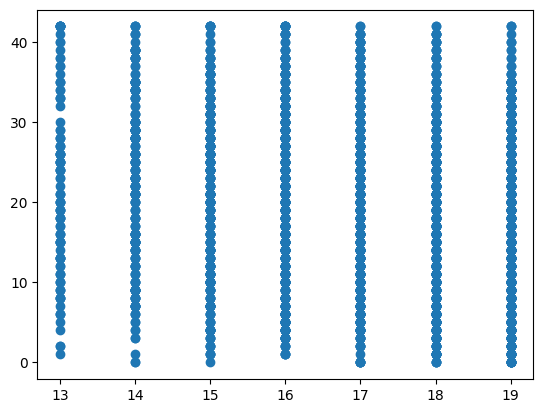

In [37]:
plt.scatter(x_test[:,-1], y_test[:,-1])

Using 2nd approach - Classification

In [38]:
modeldata = teen_data[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A',
"Q2A","Q4A","Q7A","Q9A","Q15A","Q19A","Q20A","Q23A","Q25A","Q28A","Q30A","Q36A","Q40A","Q41A",'age',"Q3A","Q5A","Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A",'Stress','Depression','Anxiety']]


len(modeldata.columns)

46

In [39]:
X = modeldata.iloc[:, :43].values
Y = modeldata.iloc[:, 43:].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
    test_size=0.2, random_state= 8)

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(11060, 43)
(11060, 3)
(2765, 43)
(2765, 3)


In [41]:
X_trainA = x_train[:, 14:29]
Y_trainA = y_train[:, -1]

X_testA = x_test[:, 14:29]
Y_testA = y_test[:, -1]

print(X_trainA.shape)
print(Y_trainA.shape)
print(X_testA.shape)
print(Y_testA.shape)

(11060, 15)
(11060,)
(2765, 15)
(2765,)


In [42]:
#Implementing Logistic Regression for Anxiety 

from sklearn.linear_model import LogisticRegression

modelA = LogisticRegression(random_state=0, multi_class='multinomial', solver='saga',max_iter=10000).fit(X_trainA, Y_trainA)


In [43]:
lrpredA = modelA.predict(X_testA)

In [44]:
modelA.score(X_trainA, Y_trainA)

1.0

In [45]:
lraccuracyA = np.mean(lrpredA == Y_testA)

print(lraccuracyA)

0.9996383363471971


In [46]:
from sklearn.metrics import classification_report

print(classification_report(Y_testA, lrpredA))

              precision    recall  f1-score   support

 Extremely A       1.00      1.00      1.00      1269
      Mild A       1.00      0.99      1.00       182
  Moderate A       1.00      1.00      1.00       435
    Normal A       1.00      1.00      1.00       447
    Severe A       1.00      1.00      1.00       432

    accuracy                           1.00      2765
   macro avg       1.00      1.00      1.00      2765
weighted avg       1.00      1.00      1.00      2765



In [47]:
#Implementing Random Forest for Anxiety
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf = rf.fit(X_trainA, Y_trainA)

In [49]:
# Use the forest's predict method on the test data
rfpredA = rf.predict(X_testA)

rfaccuracyA = np.mean(rfpredA == Y_testA)

print(rfaccuracyA)

0.874864376130199


In [50]:
from sklearn import metrics

print("Accuracy score is", metrics.accuracy_score(Y_testA, rfpredA ))

Accuracy score is 0.874864376130199


In [51]:
print(classification_report(Y_testA, rfpredA))

              precision    recall  f1-score   support

 Extremely A       0.96      0.97      0.97      1269
      Mild A       0.66      0.23      0.34       182
  Moderate A       0.74      0.86      0.79       435
    Normal A       0.86      0.98      0.92       447
    Severe A       0.82      0.77      0.80       432

    accuracy                           0.87      2765
   macro avg       0.81      0.76      0.76      2765
weighted avg       0.87      0.87      0.86      2765



In [52]:
#Implementing Decision Tree for Anxiety

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [53]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_trainA, Y_trainA)

In [54]:
dtpredA = dt.predict(X_testA)

dtaccuracyA = np.mean(dtpredA == Y_testA)

print(dtaccuracyA)

0.7471971066907775


In [55]:
print(classification_report(Y_testA, dtpredA))

              precision    recall  f1-score   support

 Extremely A       0.92      0.89      0.91      1269
      Mild A       0.32      0.30      0.31       182
  Moderate A       0.58      0.57      0.58       435
    Normal A       0.81      0.85      0.83       447
    Severe A       0.53      0.57      0.55       432

    accuracy                           0.75      2765
   macro avg       0.63      0.64      0.63      2765
weighted avg       0.75      0.75      0.75      2765



In [56]:
#Implementing Support Vector Machine for Anxiety
from sklearn.svm import SVC 


In [57]:
svm = SVC(kernel = 'linear')
svm = svm.fit(X_trainA, Y_trainA)

In [58]:
svmpredA = svm.predict(X_testA)

svmaccuracyA = np.mean(svmpredA == Y_testA)

print(svmaccuracyA)

1.0


In [59]:
print(classification_report(Y_testA, svmpredA))


              precision    recall  f1-score   support

 Extremely A       1.00      1.00      1.00      1269
      Mild A       1.00      1.00      1.00       182
  Moderate A       1.00      1.00      1.00       435
    Normal A       1.00      1.00      1.00       447
    Severe A       1.00      1.00      1.00       432

    accuracy                           1.00      2765
   macro avg       1.00      1.00      1.00      2765
weighted avg       1.00      1.00      1.00      2765



In [60]:
#Implementing Naive Bayes for Anxiety
from sklearn.naive_bayes import GaussianNB

In [61]:
gnb = GaussianNB()
gnb = gnb.fit(X_trainA, Y_trainA)

In [62]:
gnbpredA = gnb.predict(X_testA)

gnbaccuracyA = np.mean(gnbpredA == Y_testA)

print(gnbaccuracyA)

0.8216998191681736


In [63]:
print(classification_report(Y_testA, gnbpredA))

              precision    recall  f1-score   support

 Extremely A       1.00      0.86      0.92      1269
      Mild A       0.55      0.38      0.45       182
  Moderate A       0.70      0.85      0.77       435
    Normal A       0.91      0.85      0.88       447
    Severe A       0.60      0.84      0.70       432

    accuracy                           0.82      2765
   macro avg       0.75      0.76      0.74      2765
weighted avg       0.85      0.82      0.83      2765



In [64]:
X_trainA.shape

(11060, 15)

Pickel for Anxiety

In [125]:
filename = "Anxiety_pred_model"
pickle.dump(svm,open(filename,'wb'))

Model training for Stress

In [66]:
modeldataS = teen_data[['age','Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A',
"Q2A","Q4A","Q7A","Q9A","Q15A","Q19A","Q20A","Q23A","Q25A","Q28A","Q30A","Q36A","Q40A","Q41A","Q3A","Q5A","Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A",'Stress','Depression','Anxiety']]


In [67]:
X = modeldataS.iloc[:, :43].values
Y = modeldataS.iloc[:, 43:].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
    test_size=0.2, random_state= 8)

In [68]:
X_trainS = x_train[:, :15]
Y_trainS = y_train[:, -3]

X_testS = x_test[:, :15]
Y_testS = y_test[:, -3]

print(X_trainS.shape)
print(Y_trainS.shape)
print(X_testS.shape)
print(Y_testS.shape)

(11060, 15)
(11060,)
(2765, 15)
(2765,)


In [69]:
#Implementing Logistic Regression for Stress

modelS = LogisticRegression(random_state=0, multi_class='multinomial', solver='saga',max_iter=10000).fit(X_trainS, Y_trainS)


In [70]:
lrpredS = modelS.predict(X_testS)

In [71]:
modelS.score(X_trainS, Y_trainS)

1.0

In [72]:
lraccuracyS = np.mean(lrpredS == Y_testS)

print(lraccuracyS)

1.0


In [73]:
print(classification_report(Y_testS, lrpredS))

              precision    recall  f1-score   support

 Extremely S       1.00      1.00      1.00       469
      Mild S       1.00      1.00      1.00       333
  Moderate S       1.00      1.00      1.00       634
    Normal S       1.00      1.00      1.00       641
    Severe S       1.00      1.00      1.00       688

    accuracy                           1.00      2765
   macro avg       1.00      1.00      1.00      2765
weighted avg       1.00      1.00      1.00      2765



Implementing Random Forest for Stress

In [74]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf = rf.fit(X_trainS, Y_trainS)

In [75]:
# Use the forest's predict method on the test data
rfpredS = rf.predict(X_testS)

rfaccuracyS = np.mean(rfpredS == Y_testS)

print(rfaccuracyS)

0.8907775768535262


In [76]:
print("Accuracy score is", metrics.accuracy_score(Y_testS, rfpredS ))

Accuracy score is 0.8907775768535262


In [77]:
print(classification_report(Y_testS, rfpredS))

              precision    recall  f1-score   support

 Extremely S       0.97      0.90      0.94       469
      Mild S       0.83      0.61      0.70       333
  Moderate S       0.82      0.91      0.86       634
    Normal S       0.94      0.97      0.95       641
    Severe S       0.89      0.92      0.91       688

    accuracy                           0.89      2765
   macro avg       0.89      0.86      0.87      2765
weighted avg       0.89      0.89      0.89      2765



In [78]:
#Implementing Decision Tree for Stress
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_trainS, Y_trainS)

In [79]:
dtpredS = dt.predict(X_testS)

dtaccuracyS = np.mean(dtpredS == Y_testS)

print(dtaccuracyS)

0.7247739602169981


In [80]:
print(classification_report(Y_testS, dtpredS))

              precision    recall  f1-score   support

 Extremely S       0.87      0.84      0.85       469
      Mild S       0.45      0.47      0.46       333
  Moderate S       0.64      0.63      0.63       634
    Normal S       0.86      0.84      0.85       641
    Severe S       0.72      0.75      0.74       688

    accuracy                           0.72      2765
   macro avg       0.71      0.71      0.71      2765
weighted avg       0.73      0.72      0.73      2765



In [81]:
#Implementing SVM for Stress
svm = SVC(kernel = 'linear')
svm = svm.fit(X_trainS, Y_trainS)

In [82]:
svmpredS = svm.predict(X_testS)

svmaccuracyS = np.mean(svmpredS == Y_testS)

print(svmaccuracyS)

1.0


In [83]:
print(classification_report(Y_testS, svmpredS))

              precision    recall  f1-score   support

 Extremely S       1.00      1.00      1.00       469
      Mild S       1.00      1.00      1.00       333
  Moderate S       1.00      1.00      1.00       634
    Normal S       1.00      1.00      1.00       641
    Severe S       1.00      1.00      1.00       688

    accuracy                           1.00      2765
   macro avg       1.00      1.00      1.00      2765
weighted avg       1.00      1.00      1.00      2765



In [84]:
#Implementing Naive Bayes for Stress
gnb = GaussianNB()
gnb = gnb.fit(X_trainS, Y_trainS)

In [85]:
gnbpredS = gnb.predict(X_testS)

gnbaccuracyS = np.mean(gnbpredS == Y_testS)

print(gnbaccuracyS)

0.8896925858951176


In [86]:
X_trainS.shape

(11060, 15)

In [87]:
print(classification_report(Y_testS, gnbpredS))


              precision    recall  f1-score   support

 Extremely S       0.96      0.85      0.90       469
      Mild S       0.73      0.84      0.78       333
  Moderate S       0.86      0.94      0.90       634
    Normal S       1.00      0.87      0.93       641
    Severe S       0.88      0.92      0.89       688

    accuracy                           0.89      2765
   macro avg       0.89      0.88      0.88      2765
weighted avg       0.90      0.89      0.89      2765



Pickel for Stress

In [124]:
filename = "Stress_pred_model"
pickle.dump(modelS,open(filename,'wb'))

Model for Depression

In [89]:
modeldataD = teen_data[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A',
"Q2A","Q4A","Q7A","Q9A","Q15A","Q19A","Q20A","Q23A","Q25A","Q28A","Q30A","Q36A","Q40A","Q41A","Q3A","Q5A","Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A",'age','Stress','Depression','Anxiety']]


In [90]:
X = modeldataD.iloc[:, :43].values
Y = modeldataD.iloc[:, 43:].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
    test_size=0.2, random_state= 8)

In [91]:
X_trainD = x_train[:, 28:43]
Y_trainD = y_train[:, -2]

X_testD = x_test[:, 28:43]
Y_testD = y_test[:, -2]

print(X_trainD.shape)
print(Y_trainD.shape)
print(X_testD.shape)
print(Y_testD.shape)

(11060, 15)
(11060,)
(2765, 15)
(2765,)


In [92]:
#Implementing Logistic Regression for Depression

modelD = LogisticRegression(random_state=0, multi_class='multinomial', solver='saga',max_iter=10000).fit(X_trainD, Y_trainD)


In [93]:
lrpredD = modelD.predict(X_testD)

In [94]:
modelD.score(X_trainD, Y_trainD)

0.9972875226039783

In [95]:
lraccuracyD = np.mean(lrpredD == Y_testD)

print(lraccuracyD)

0.9960216998191682


In [96]:
print(classification_report(Y_testD, lrpredD))

              precision    recall  f1-score   support

 Extremely D       1.00      1.00      1.00      1649
      Mild D       1.00      1.00      1.00       232
  Moderate D       1.00      0.84      0.91        69
    Normal D       1.00      1.00      1.00       475
    Severe D       0.97      1.00      0.99       340

    accuracy                           1.00      2765
   macro avg       0.99      0.97      0.98      2765
weighted avg       1.00      1.00      1.00      2765



In [97]:
#Implementing Random Forest for Depression
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf = rf.fit(X_trainD, Y_trainD)

In [98]:
# Use the forest's predict method on the test data
rfpredD = rf.predict(X_testD)

rfaccuracyD = np.mean(rfpredD == Y_testD)

print(rfaccuracyD)

0.9265822784810127


In [99]:
print("Accuracy score is", metrics.accuracy_score(Y_testD, rfpredD ))

Accuracy score is 0.9265822784810127


In [100]:
print(classification_report(Y_testD, rfpredD))

              precision    recall  f1-score   support

 Extremely D       0.98      0.99      0.98      1649
      Mild D       0.79      0.73      0.76       232
  Moderate D       0.44      0.06      0.10        69
    Normal D       0.92      0.98      0.95       475
    Severe D       0.80      0.86      0.83       340

    accuracy                           0.93      2765
   macro avg       0.79      0.72      0.72      2765
weighted avg       0.92      0.93      0.92      2765



In [101]:
#Implementing Decision Tree for Depression
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_trainD, Y_trainD)

In [102]:
dtpredD = dt.predict(X_testD)

dtaccuracyD = np.mean(dtpredD == Y_testD)

print(dtaccuracyD)

0.844122965641953


In [103]:
print(classification_report(Y_testD, dtpredD))

              precision    recall  f1-score   support

 Extremely D       0.95      0.95      0.95      1649
      Mild D       0.55      0.48      0.51       232
  Moderate D       0.16      0.19      0.17        69
    Normal D       0.89      0.91      0.90       475
    Severe D       0.61      0.64      0.62       340

    accuracy                           0.84      2765
   macro avg       0.63      0.63      0.63      2765
weighted avg       0.85      0.84      0.84      2765



In [104]:
#Implementing the SVM model for Depression
svm = SVC(kernel = 'linear')
svm = svm.fit(X_trainD, Y_trainD)

In [105]:
svmpredD = svm.predict(X_testD)

svmaccuracyD = np.mean(svmpredD == Y_testD)

print(svmaccuracyD)

1.0


In [106]:
print(classification_report(Y_testD, svmpredD))

              precision    recall  f1-score   support

 Extremely D       1.00      1.00      1.00      1649
      Mild D       1.00      1.00      1.00       232
  Moderate D       1.00      1.00      1.00        69
    Normal D       1.00      1.00      1.00       475
    Severe D       1.00      1.00      1.00       340

    accuracy                           1.00      2765
   macro avg       1.00      1.00      1.00      2765
weighted avg       1.00      1.00      1.00      2765



In [107]:
#Implementing Naive Bayes for Depression
gnb = GaussianNB()
gnb = gnb.fit(X_trainD, Y_trainD)

In [108]:
gnbpredD = gnb.predict(X_testD)

gnbaccuracyD = np.mean(gnbpredD == Y_testD)

print(gnbaccuracyD)

0.8546112115732369


In [109]:
print(classification_report(Y_testD, gnbpredD))

              precision    recall  f1-score   support

 Extremely D       1.00      0.86      0.93      1649
      Mild D       0.65      0.87      0.74       232
  Moderate D       0.00      0.00      0.00        69
    Normal D       1.00      0.86      0.93       475
    Severe D       0.53      0.97      0.69       340

    accuracy                           0.85      2765
   macro avg       0.64      0.71      0.66      2765
weighted avg       0.89      0.85      0.86      2765



Pickel for Depression

In [123]:
filename = "Depression_pred_model"
pickle.dump(svm,open(filename,'wb'))

Using the Pickel File
  

In [132]:
loaded_Depression_model = pickle.load(open("Depression_pred_model" , "rb"))
loaded_Anxiety_model = pickle.load(open("Anxiety_pred_model" , "rb"))
loaded_Stress_model = pickle.load(open("Stress_pred_model" , "rb"))

input_data = [ 1  ,0  ,1  ,2  ,0  ,2  ,1  ,0  ,1  ,1  ,2  ,1  ,2  ,0 ,16]

pred_Depression_result = loaded_Depression_model.predict([input_data])
pred_Anxiety_result = loaded_Anxiety_model.predict([input_data])
pred_Stress_result = loaded_Stress_model.predict([input_data])

# pred_Anxiety_result = loaded_Depression_model.predict([[ 0 , 0 , 0 ,  1 , 0 , 1 , 2 , 0 , 1 , 0 , 3 , 0 , 1 , 1 ,15 ]])
# pred_Stress_result = loaded_Depression_model.predict([[ 0 , 0 , 0 ,  1 , 0 , 1 , 2 , 0 , 1 , 0 , 3 , 0 , 1 , 1 ,15 ]])

print("The Respective Depression , Anxiety  and Stress Level's are :")
print(pred_Depression_result )
print(pred_Anxiety_result)
print(pred_Stress_result)


The Respective Depression , Anxiety  and Stress Level's are :
['Moderate D']
['Moderate A']
['Severe S']
